In [77]:
# Se instala la librería scikit-learn pues se utilizará en esta sección:

pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\commands\install.py", line 324, in run
    session = self.get_default_session(options)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_internal\cli\req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
                                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Us

In [78]:
# Se importan las librerías necesarias para la tarea:
 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Se cargan 5 datasets, una para cada año, desde el 2016 al 2020. 

df1 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2016_accidents_causa_conductor_gu_bcn_.csv')
df2 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2017_accidents_causa_conductor_gu_bcn_.csv')
df3 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2018_accidents_causa_conductor_gu_bcn_.csv')
df4 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2019_accidents_causa_conductor_gu_bcn_.csv')
df5 = pd.read_csv('C:/UNI/Cursos_2024/Haaktoon/raw_data/2020_accidents_causa_conductor_gu_bcn_.csv')

# Se juntan los 5 datasets en uno solo llamado df_unido a través de concat:

df_unido = pd.concat([df1, df2, df3, df4, df5], ignore_index = True )

In [79]:
# Se realiza la corrección, como realizado en el file anterior del EDA:

# Se ha indentificado un error en la denominación de las columnas. En lugar de "Descripcio_torn" debería 
# decir "Descripcio_causa_conductor"; y viceversa. Se corrige:

df_unido.rename(columns={'Descripcio_torn': 'Descripcio_causa_conductor', 'Descripcio_causa_conductor': 'Descripcio_torn' }, inplace=True)


In [84]:
# Se realiza una limpieza básica. 
# Además se decide eliminar las columnas 'Numero_expedient', 'Coordenades_UTM_X_ED50'y 'Coordenades_UTM_Y_ED50' pues no aportan valor.

df_unido = df_unido.drop(columns=['Numero_expedient', 'Coordenades_UTM_X_ED50', 'Coordenades_UTM_Y_ED50'], errors='ignore')

In [85]:
# Se llenan los valores nulos con la técnica forward fill

df_unido.fillna(method='ffill', inplace=True)

C:\Users\josep\AppData\Local\Temp\ipykernel_23240\3837426807.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_unido.fillna(method='ffill', inplace=True)


In [86]:
# Se codifican las variables categóricas 

df_unido = pd.get_dummies(df_unido, drop_first=True)

In [87]:
# Se definen las características (X) y el objetivo (y)

print(df_unido.columns)
X = df_unido.drop(columns=['Descripcio_causa_conductor_No respectar distàncies', 
                     "Descripcio_causa_conductor_Manca d'atenció a la conducció"])
y = df_unido['Descripcio_causa_conductor_No respectar distàncies']

Index(['Codi_districte', 'Codi_barri', 'Codi_carrer', 'NK_Any', 'Mes_any',
       'Dia_mes', 'Hora_dia', 'Coordenada_UTM_X_ED50', 'Coordenada_UTM_Y_ED50',
       'Longitud',
       ...
       'Descripcio_causa_conductor_Gir indegut o sense precaució',
       'Descripcio_causa_conductor_Manca d'atenció a la conducció',
       'Descripcio_causa_conductor_Manca precaució efectuar marxa enrera',
       'Descripcio_causa_conductor_Manca precaució incorporació circulació',
       'Descripcio_causa_conductor_No cedir la dreta',
       'Descripcio_causa_conductor_No determinada',
       'Descripcio_causa_conductor_No respectar distàncies',
       'Descripcio_causa_conductor_No respectat pas de vianants',
       'Descripcio_torn_Nit', 'Descripcio_torn_Tarda'],
      dtype='object', length=6054)


In [91]:
# Se dividen los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# Se entrena el modelo de Regresión Logística

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [93]:
# Se realiza la predicción y evaluación

y_pred_logreg = log_reg.predict(X_test)

In [94]:
# Se muestra el reporte de clasificación para el modelo de Regresión Logística:

print("Resultados del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_logreg))

Resultados del modelo de Regresión Logística:
              precision    recall  f1-score   support

       False       0.88      1.00      0.94     13535
        True       0.00      0.00      0.00      1782

    accuracy                           0.88     15317
   macro avg       0.44      0.50      0.47     15317
weighted avg       0.78      0.88      0.83     15317



c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [95]:
# Se entrena el modelo Random Forest

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
# Se predice y evalua

y_pred_rf = rf_clf.predict(X_test)

In [97]:
# Se muestra el reporte de clasificación para el modeo Random Forest:

print("Resultados del modelo Random Forest:")
print(classification_report(y_test, y_pred_rf))

Resultados del modelo Random Forest:
              precision    recall  f1-score   support

       False       0.89      0.99      0.94     13535
        True       0.33      0.04      0.07      1782

    accuracy                           0.88     15317
   macro avg       0.61      0.52      0.50     15317
weighted avg       0.82      0.88      0.83     15317



In [98]:
#  La mostrará la confusion matrix para ambos modelos:

plt.figure(figsize=(9, 9))

<Figure size 900x900 with 0 Axes>

<Figure size 900x900 with 0 Axes>

Text(0.5, 1.0, 'Confusion Matrix - Regresión Logística')

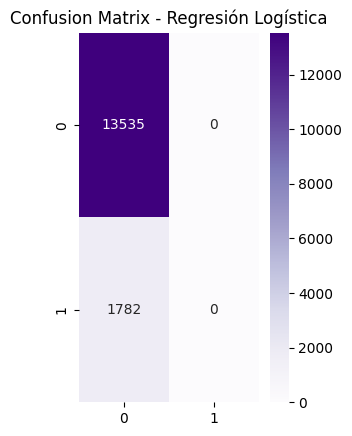

In [99]:
# Se muestra la matriz de confusión para Regresión Logística

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Regresión Logística')

Text(0.5, 1.0, 'Matriz de Confusión - Random Forest')

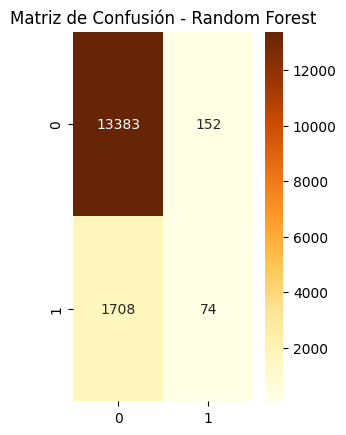

In [100]:
# Se muestra la confusion matrix para Random Forest:

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='YlOrBr')
plt.title('Matriz de Confusión - Random Forest')